# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to **import** any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Change the name of file with your roll no.



In [187]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 6: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

BayesA) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

BayesB) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

BayesC) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [188]:
# Cell type : CodeWrite

def function_for_A(X_train, Y_train, X_test, threshold = 0.5):
    """ Give prediction for test instance using assumption BayesA.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)
    threshold : p(Y = +1 | X) >= threshold will be predicted as class +1

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    # n : no of training examples | d : dimension of each datapoint x
    n, d = X_train.shape

    # In n_C, mu and sigma arrays, 0th index - values for +1, 1st index - values for -1
    n_C = [np.sum(Y_train > 0), 0]
    n_C[1] = n - n_C[0]
    n_C = np.array(n_C)
    prior = n_C / n

    pos_ind = np.where(Y_train > 0)
    neg_ind = np.where(Y_train < 0)

    # mu estimated by maximum likelihood approach (here sigma is given to be identity for both)
    mu = [np.sum(X_train[pos_ind], axis = 0) / n_C[0], np.sum(X_train[neg_ind], axis = 0) / n_C[1]]
    mu = np.array([mu[0].reshape((mu[0].shape[0],1)), mu[1].reshape((mu[1].shape[0],1))])

    p_Cp_x = lambda x : np.exp(-0.5 * (x - mu[0]).T @ (x - mu[0]))
    p_Cn_x = lambda x : np.exp(-0.5 * (x - mu[1]).T @ (x - mu[1]))

    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        p_Cp_giv_x = p_Cp_x(X_test[[i]].T) * prior[0]
        p_Cn_giv_x = p_Cn_x(X_test[[i]].T) * prior[1]
        Y_test_pred[i] = 1 if p_Cp_giv_x >= threshold * (p_Cp_giv_x + p_Cn_giv_x) else -1

    return Y_test_pred

    
def function_for_B(X_train, Y_train, X_test, threshold = 0.5):
    """ Give prediction for test instance using assumption BayesB.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)
    threshold : p(Y = +1 | X) >= threshold will be predicted as class +1

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    # n : no of training examples | d : dimension of each datapoint x
    n, d = X_train.shape

    # In n_C, mu and sigma arrays, 0th index - values for +1, 1st index - values for -1
    n_C = [np.sum(Y_train > 0), 0]
    n_C[1] = n - n_C[0]
    n_C = np.array(n_C)
    prior = n_C / n

    pos_ind = np.where(Y_train > 0)
    neg_ind = np.where(Y_train < 0)

    # mu and sigma estimated by maximum likelihood approach (here sigma is same for both)
    mu = [np.sum(X_train[pos_ind], axis = 0) / n_C[0], np.sum(X_train[neg_ind], axis = 0) / n_C[1]]
    mu = np.array([mu[0].reshape((mu[0].shape[0],1)), mu[1].reshape((mu[1].shape[0],1))])
    mu_overall = (mu[0] * n_C[0] + mu[1] * n_C[1]) / n
    common_sigma = (X_train.T - mu_overall) @ (X_train.T - mu_overall).T / n
    common_sigma_inv = np.linalg.inv(common_sigma)

    p_Cp_x = lambda x : np.exp(-0.5 * (x - mu[0]).T @ common_sigma_inv @ (x - mu[0]))
    p_Cn_x = lambda x : np.exp(-0.5 * (x - mu[1]).T @ common_sigma_inv @ (x - mu[1]))

    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        p_Cp_giv_x = p_Cp_x(X_test[[i]].T) * prior[0]
        p_Cn_giv_x = p_Cn_x(X_test[[i]].T) * prior[1]

        Y_test_pred[i] = 1 if p_Cp_giv_x >= threshold * (p_Cp_giv_x + p_Cn_giv_x) else -1

    return Y_test_pred


def function_for_C(X_train, Y_train, X_test, threshold = 0.5):
    """ Give prediction for test instance using assumption BayesC.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)
    threshold : p(Y = +1 | X) >= threshold will be predicted as class +1

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    # n : no of training examples | d : dimension of each datapoint x
    n, d = X_train.shape

    # In n_C, mu and sigma arrays, 0th index - values for +1, 1st index - values for -1
    n_C = [np.sum(Y_train > 0), 0]
    n_C[1] = n - n_C[0]
    n_C = np.array(n_C)
    prior = n_C / n

    pos_ind = np.where(Y_train > 0)
    neg_ind = np.where(Y_train < 0)

    # mu and sigma estimated by maximum likelihood approach
    mu = [np.sum(X_train[pos_ind], axis = 0) / n_C[0], np.sum(X_train[neg_ind], axis = 0) / n_C[1]]
    mu = np.array([mu[0].reshape((mu[0].shape[0],1)), mu[1].reshape((mu[1].shape[0],1))])
    sigma = np.array([(X_train[pos_ind].T - mu[0]) @ (X_train[pos_ind].T - mu[0]).T / n_C[0], \
                      (X_train[neg_ind].T - mu[1]) @ (X_train[neg_ind].T - mu[1]).T / n_C[1]])
    sigma_inv = np.array([np.linalg.inv(sigma[0]), np.linalg.inv(sigma[1])])

    p_Cp_x = lambda x : np.exp(-0.5 * (x - mu[0]).T @ sigma_inv[0] @ (x - mu[0])) / np.sqrt(abs(np.linalg.det(sigma[0])))
    p_Cn_x = lambda x : np.exp(-0.5 * (x - mu[1]).T @ sigma_inv[1] @ (x - mu[1])) /np.sqrt(abs(np.linalg.det(sigma[1])))

    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        p_Cp_giv_x = p_Cp_x(X_test[[i]].T) * prior[0]
        p_Cn_giv_x = p_Cn_x(X_test[[i]].T) * prior[1]

        Y_test_pred[i] = 1 if p_Cp_giv_x >= threshold * (p_Cp_giv_x + p_Cn_giv_x) else -1

    return Y_test_pred
    


In [189]:
# Cell type : Convenience

# Testing the functions above

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 
# try to remove everything or comment out your lines before submitting.


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = function_for_A(X_train, Y_train, X_test)
# print(Y_pred_test_1a)
Y_pred_test_1b = function_for_B(X_train, Y_train, X_test)
# print(Y_pred_test_1b)
Y_pred_test_1c = function_for_C(X_train, Y_train, X_test)
# print(Y_pred_test_1c)

**Cell type : TextRead**

# Problem 6

#### 6a) Run the above three algorithms (BayesA,B and C), for the three datasets given (datasetA.npz, datasetB.npz, datasetC.npz) in the cell below.
#### In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately.





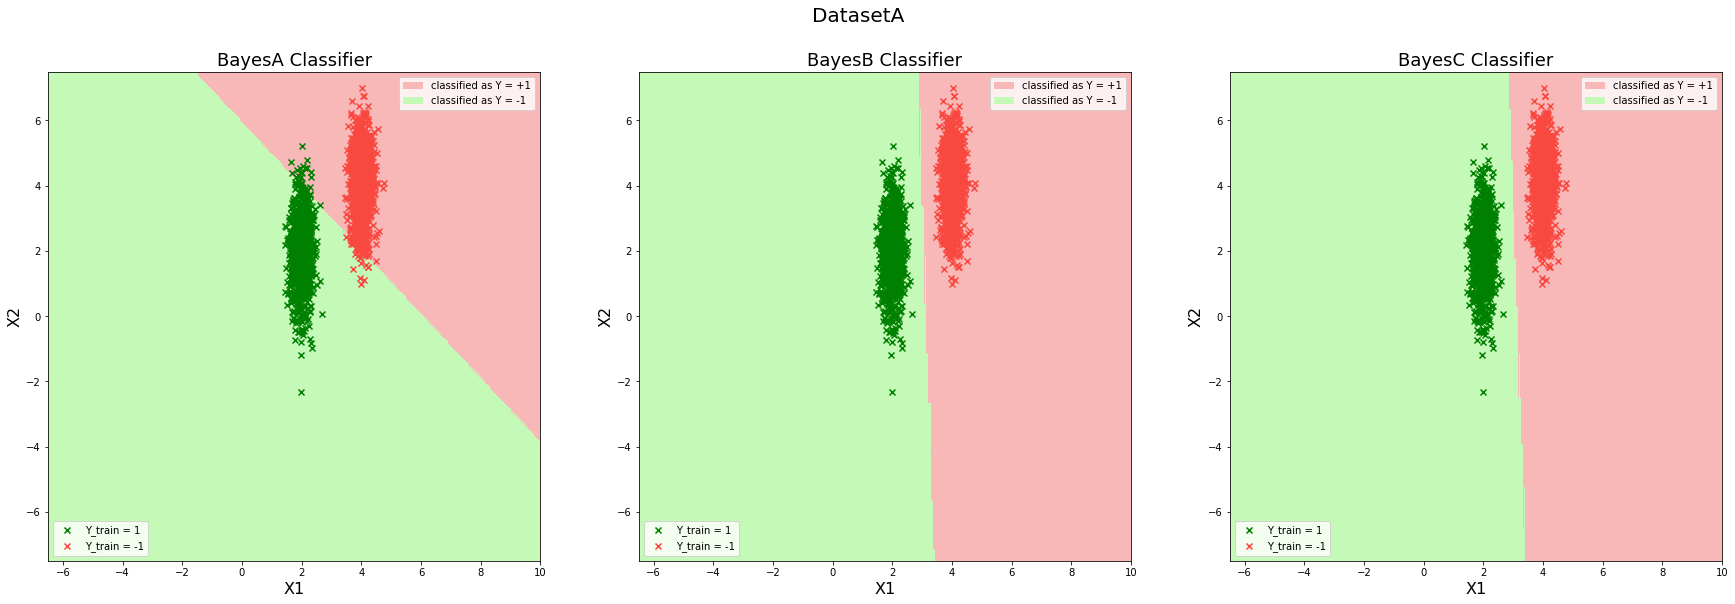

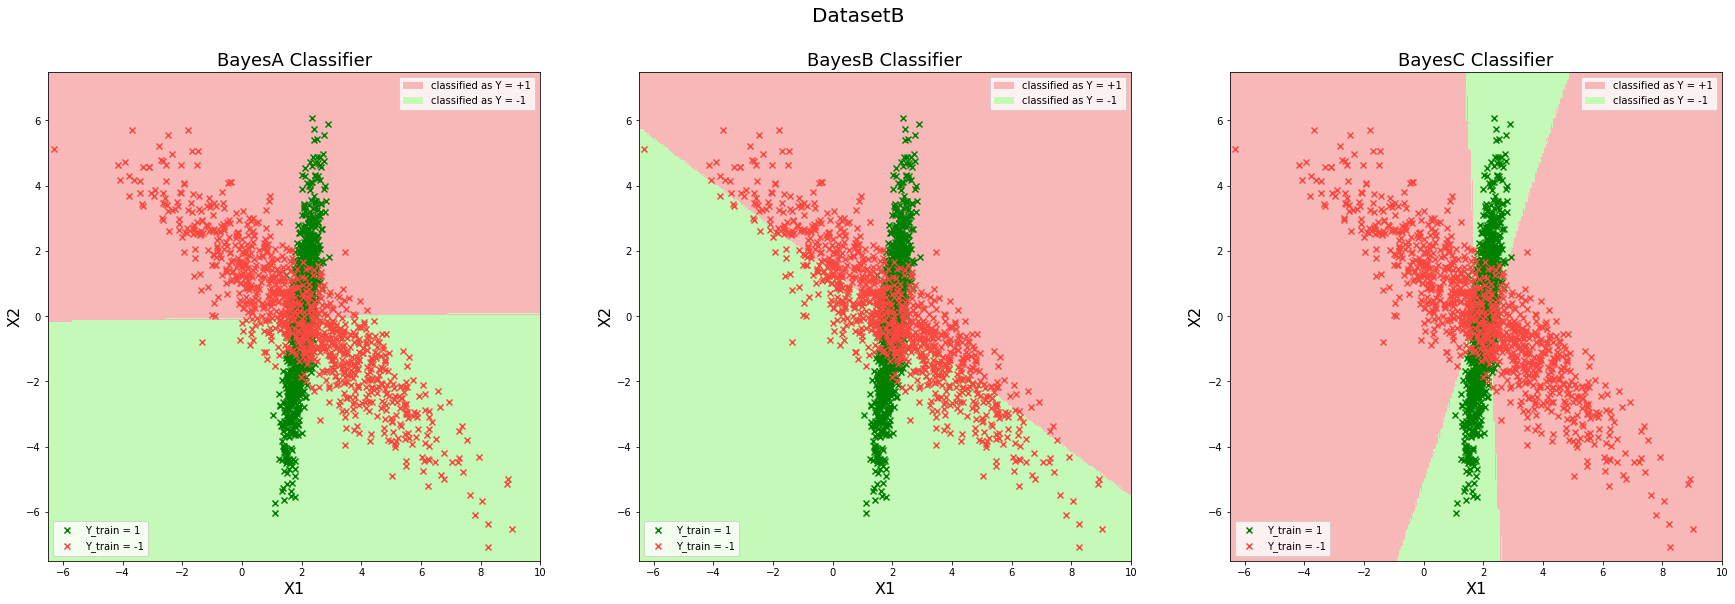

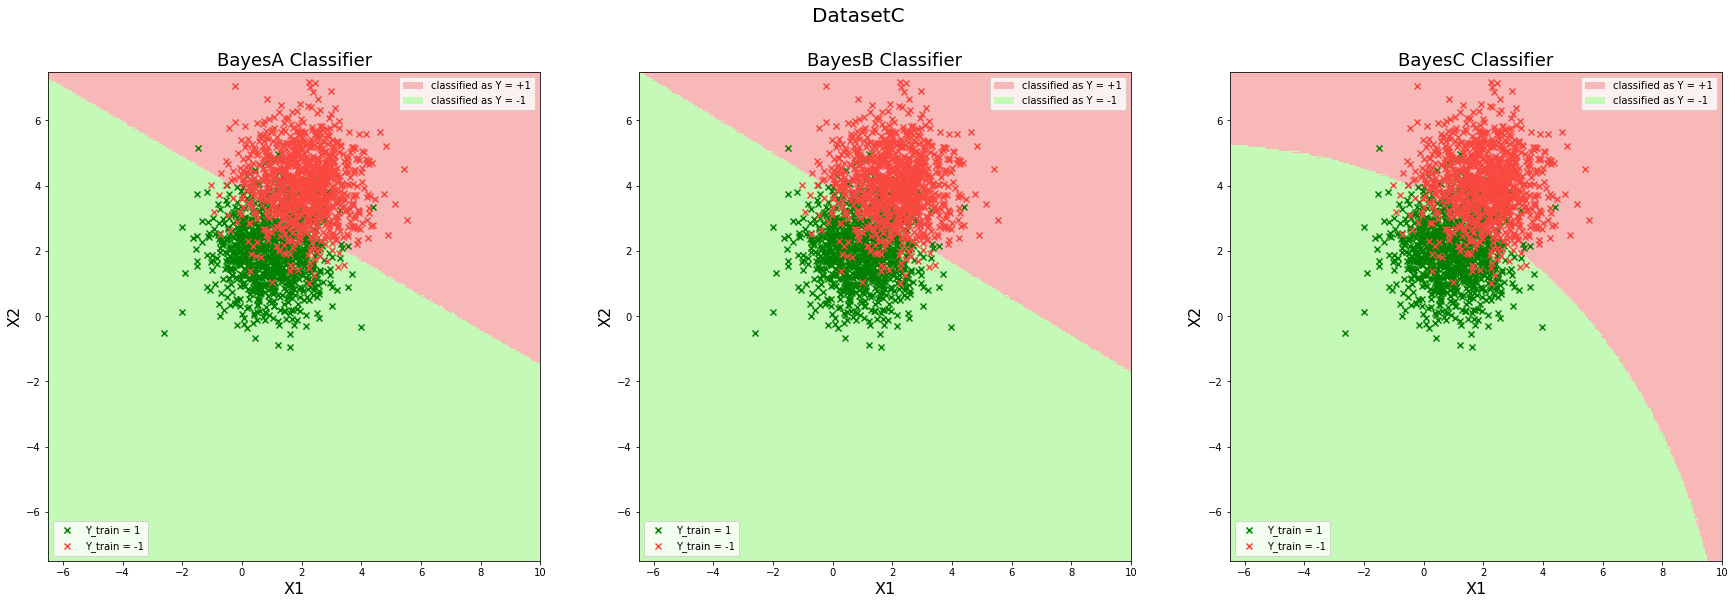

--------------------- ERROR RATES MATRIX -----------------------
[[0.098  0.229  0.2255]
 [0.5085 0.504  0.0745]
 [0.1175 0.1165 0.118 ]]


In [190]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

Bayes_fn = {'A': function_for_A, 'B': function_for_B, 'C': function_for_C}

def load_data():
    X_train, Y_train, X_test, Y_test = {}, {}, {}, {}

    for i in ['A', 'B', 'C']:
        data = np.load("Data/dataset"+i+".npz")
        X_train[i] = data['arr_0']
        Y_train[i] = data['arr_1']
        X_test[i]  = data['arr_2']
        Y_test[i]  = data['arr_3']

    return X_train, Y_train, X_test, Y_test

def calc_error_matrix(X_train, Y_train, X_test, Y_test):
    error_mat = np.ndarray(shape=(3,3))

    for dataset_ind in ['A', 'B', 'C']:
        for classifier_ind in ['A', 'B', 'C']:
            Y_pred = Bayes_fn[classifier_ind](X_train[dataset_ind],Y_train[dataset_ind], X_test[dataset_ind])
            error_mat[ord(dataset_ind) - ord('A')][ord(classifier_ind) - ord('A')] = np.sum(Y_pred != Y_test[dataset_ind]) / Y_test[dataset_ind].shape[0]
    
    return error_mat


def plot_classifiers(dataset_ind, X_train, Y_train):
    f, axs = plt.subplots(1, 3)
    axes = {'A': axs[0], 'B': axs[1], 'C': axs[2]}
    f.set_size_inches(30, 9, forward=True)
    f.suptitle('Dataset' + dataset_ind, fontsize=20)
    
    n1, n2 = 300, 300
    x1 = np.linspace(-6.5,10,n1)
    x2 = np.linspace(-7.5,7.5,n2)
    X1, X2 = np.meshgrid(x1,x2)
    x1 = X1.reshape((n1*n2,1))
    x2 = X2.reshape((n1*n2,1))
    X_test = np.concatenate((x1,x2),axis=1)

    Y = {}
    for classifier_ind in ['A', 'B', 'C']:
        Y[classifier_ind] = Bayes_fn[classifier_ind](X_train, Y_train, X_test).reshape((n1,n2))
    
    for classifier_ind, ax in axes.items():
        cf = ax.contourf(X1, X2, Y[classifier_ind], colors = ['#F8B8B8', '#C5F9B8'])
        proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in cf.collections]
        contour_legend = ax.legend(proxy, ["classified as Y = +1", "classified as Y = -1"] , loc = "upper right")
        ax.add_artist(contour_legend)
        ax.set_ylabel("X2", fontsize=16)
        ax.set_xlabel("X1", fontsize=16) 
        ax.set_title(f"Bayes{classifier_ind} Classifier", fontsize=18) 
        X_train_pos = X_train[Y_train > 0]
        X_train_neg = X_train[Y_train < 0]
        ax.scatter(X_train_pos[:,0], X_train_pos[:,1], c='green', marker = 'x', label='Y_train = 1')
        ax.scatter(X_train_neg[:,0], X_train_neg[:,1], c='#F8483F', marker = 'x', label='Y_train = -1')
        ax.legend(loc = "lower left")

X_train, Y_train, X_test, Y_test = load_data()
# print(X_train['A'].shape, X_train['B'].shape, X_train['C'].shape)

# for ind in ['A', 'B', 'C']:
#     print(np.min(X_train[ind], axis = 0), np.max(X_train[ind], axis = 0))

for dataset_ind in ['A', 'B', 'C']:
    plot_classifiers(dataset_ind, X_train[dataset_ind], Y_train[dataset_ind])
    # plt.savefig(f'qn6_p1_data{dataset_ind}.png')
plt.show()

error_matrix = calc_error_matrix(X_train, Y_train, X_test, Y_test)
print('--------------------- ERROR RATES MATRIX -----------------------')
print(error_matrix)

####6b) Give the ROC Curves for all the classifiers.



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


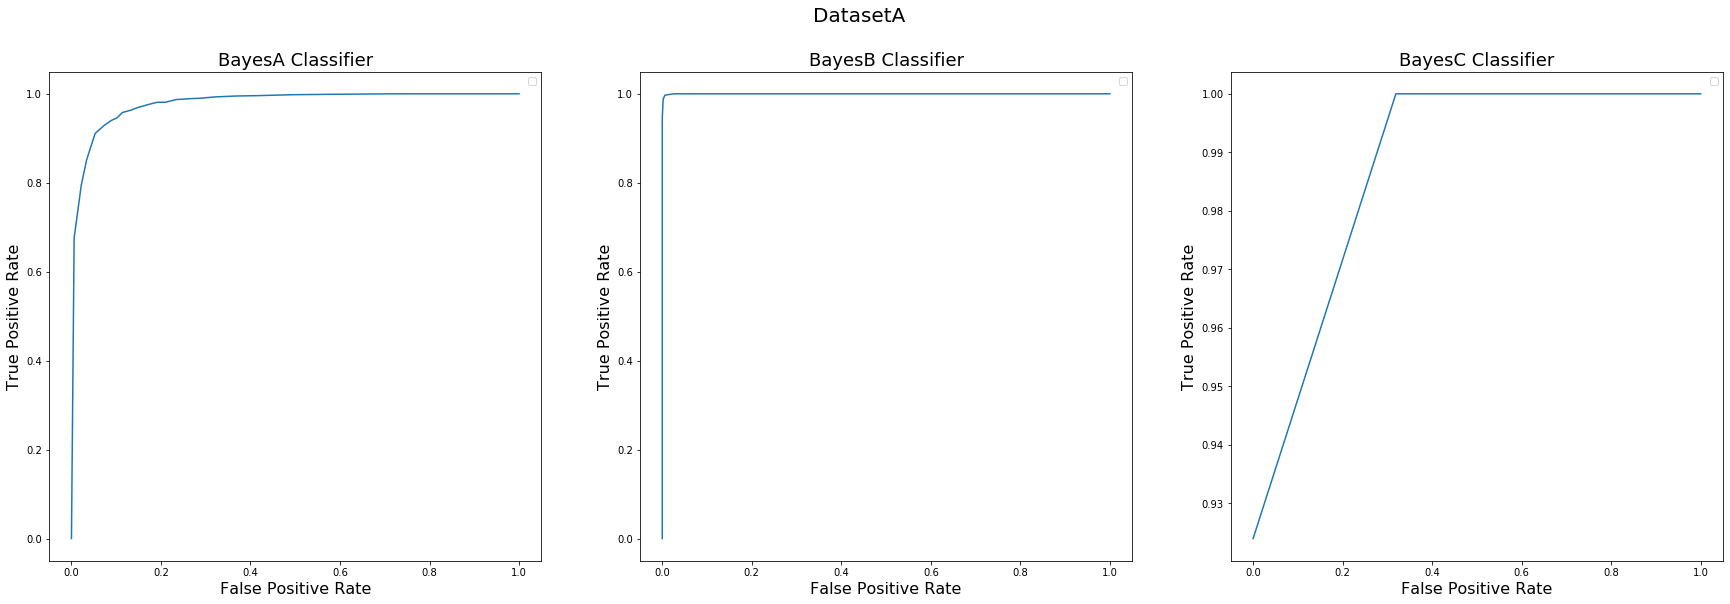

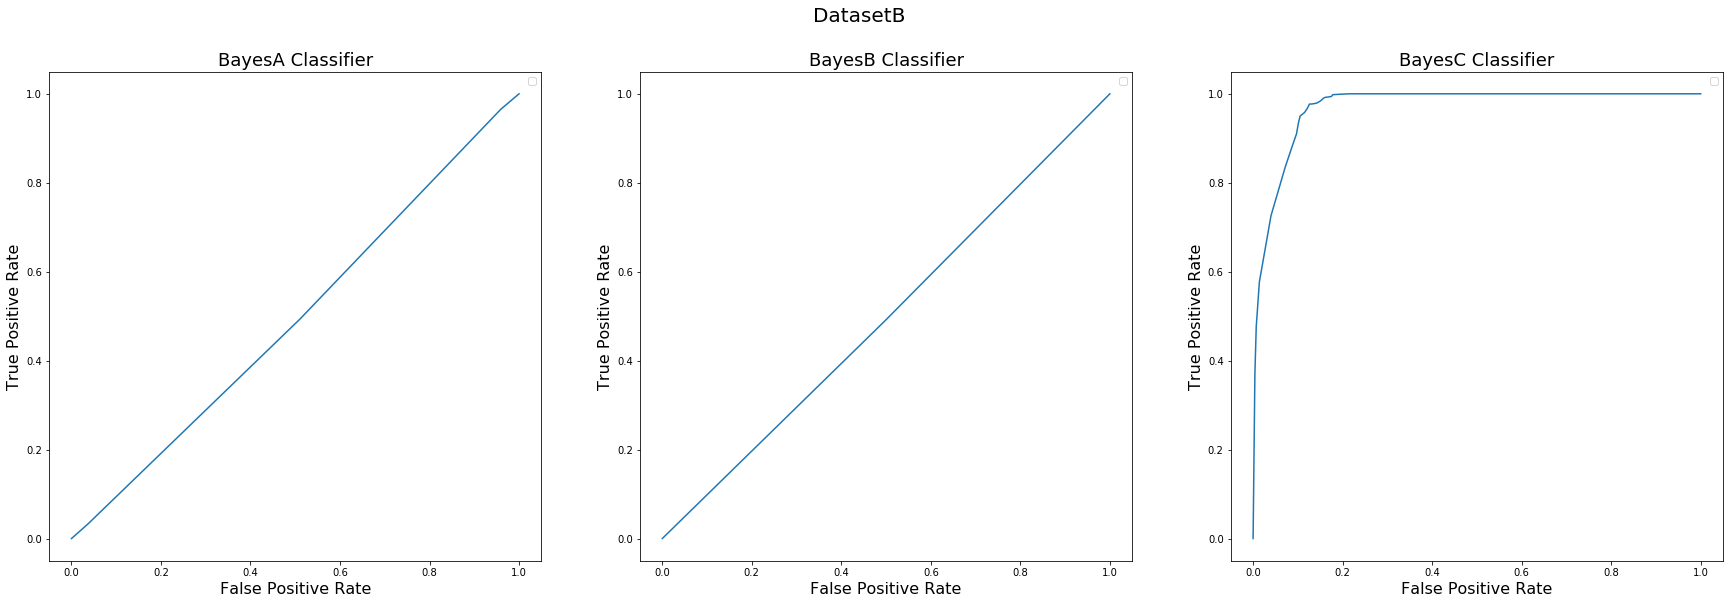

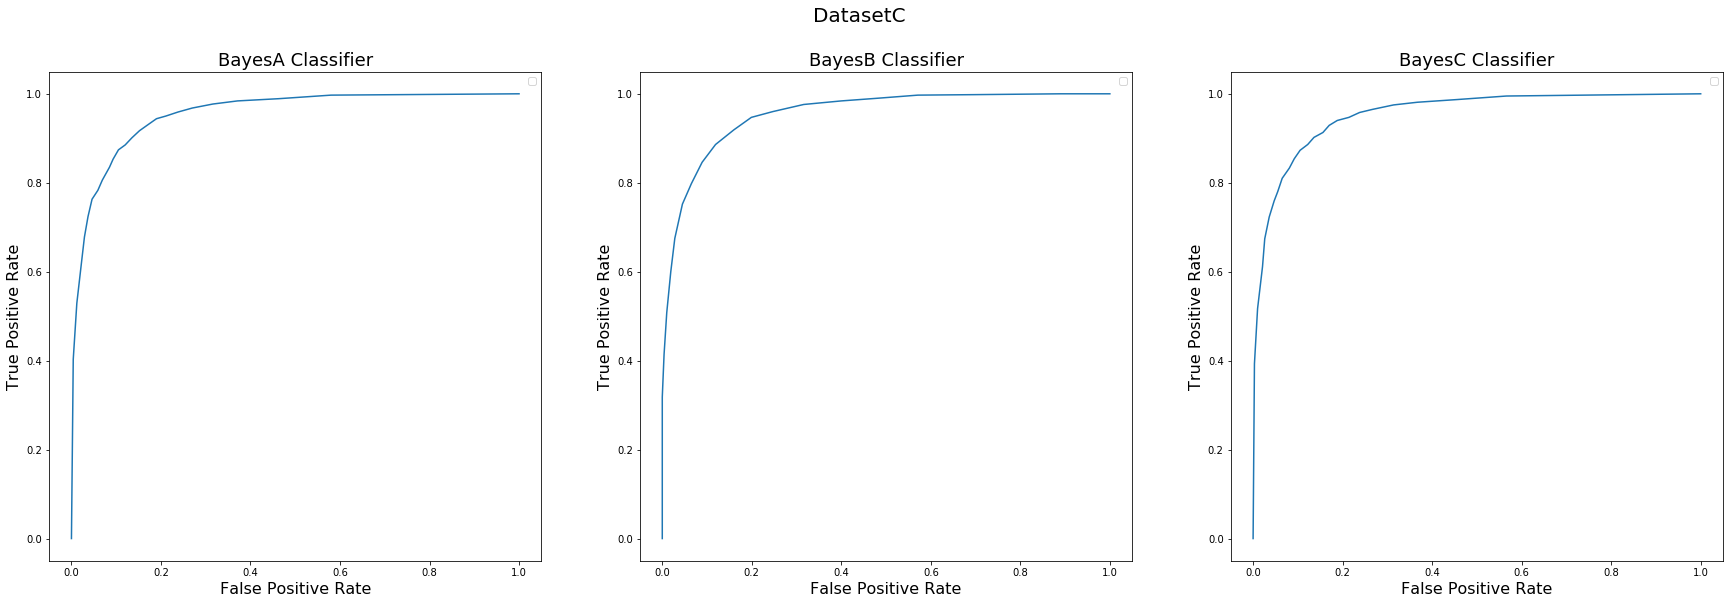

In [191]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

Bayes_fn = {'A': function_for_A, 'B': function_for_B, 'C': function_for_C}

def load_data():
    X_train, Y_train, X_test, Y_test = {}, {}, {}, {}

    for i in ['A', 'B', 'C']:
        data = np.load("Data/dataset"+i+".npz")
        X_train[i] = data['arr_0']
        Y_train[i] = data['arr_1']
        X_test[i]  = data['arr_2']
        Y_test[i]  = data['arr_3']

    return X_train, Y_train, X_test, Y_test

def plot_ROC(dataset_ind, X_train, Y_train, X_test, Y_test):
    f, axs = plt.subplots(1, 3)
    axes = {'A': axs[0], 'B': axs[1], 'C': axs[2]}
    f.set_size_inches(30, 9, forward=True)
    f.suptitle('Dataset' + dataset_ind, fontsize=20)
    
    thresholds = np.linspace(0, 1, 25)

    Y = []
    for classifier_ind in ['A', 'B', 'C']:
        TPR, FPR = [], []
        for thresh in thresholds:
            Y_test_pred = Bayes_fn[classifier_ind](X_train, Y_train, X_test, thresh)
            TP = np.sum(np.logical_and(Y_test > 0, Y_test_pred > 0))
            FP = np.sum(np.logical_and(Y_test < 0, Y_test_pred > 0))
            TN = np.sum(np.logical_and(Y_test < 0, Y_test_pred < 0))
            FN = np.sum(np.logical_and(Y_test > 0, Y_test_pred < 0))
            if TP+FN > 0 and FP+TN > 0:
                TPR.append(TP / (TP+FN))
                FPR.append(FP / (FP+TN))

        ax = axes[classifier_ind]
        ax.set_ylabel("True Positive Rate", fontsize=16)
        ax.set_xlabel("False Positive Rate", fontsize=16) 
        ax.set_title(f"Bayes{classifier_ind} Classifier", fontsize=18) 
        ax.plot(FPR, TPR, linestyle = '-')
        ax.legend(loc = "upper right")

X_train, Y_train, X_test, Y_test = load_data()

for dataset_ind in ['A', 'B', 'C']:
    plot_ROC(dataset_ind, X_train[dataset_ind], Y_train[dataset_ind], X_test[dataset_ind], Y_test[dataset_ind])
    # plt.savefig(f'qn6_p2_data{dataset_ind}.png')
plt.show()

####6c) In the next Textwrite cell, give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.



**Cell type : TextWrite**
(Write your observations and table of errors here)

<br>

### **Table of Error Rates (Normalized to be <= 1)**

| Dataset     	| BayesA    	| BayesB    	| BayesC     	|
|-------------	|------------	|------------	|-------------	|
| A         	| 0.098      	| 0.229     	| 0.2255     	|
| B         	| 0.5085     	| 0.504       	| 0.0745        |
| C         	| 0.1175     	| 0.1165      	| 0.118      	|


####6d) In the next Textwrite cell, summarise your observations regarding the nine learnt classifiers.

**Cell type : TextWrite**
(Write your observations and table of errors here)

<br>

### **Observations**

#### *Bayes Classifier A*
<ul>
   <li> $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. </li>
   <li> The decision boundary is linear in $x$ ($w^T x + b$ form) and is given by :
    \begin{align*}
        2(\mu_- - \mu_+)^T x + (\mu_+^T\mu_+ - \mu_-^T\mu_-) + 2 \log\Bigg(\frac{p(Y = -1)}{p(Y = +1)}\Bigg) = 0
    \end{align*} 
   </li>
   <li> The shape of decision boundary in the plots for classifier A is hence straight, representing the linear nature of the boundary. </li>
</ul>

#### *Bayes Classifier B*
<ul>
   <li> $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$. </li>
   <li> The decision boundary is again linear in $x$ ($w^T x + b$ form) and is given by :
    \begin{align*}
        2(\mu_- - \mu_+)^T\Sigma^{-1} x + (\mu_+^T\Sigma^{-1}\mu_+ - \mu_-^T\Sigma^{-1}\mu_-) + 2 \log\Bigg(\frac{p(Y = -1)}{p(Y = +1)}\Bigg) = 0
    \end{align*}
   </li>
   <li> The shape of decision boundary in the plots for classifier B is hence straight, representing the linear nature of the boundary. </li>
</ul>
    
#### *Bayes Classifier C*
<ul>
   <li> $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$. </li>
   <li> The decision boundary is quadratic in $x$ (contains $x^T S x$ term along with linear terms) and is given by :
    \begin{align*}
        x^T(\Sigma_{+}^{-1} - \Sigma_{-}^{-1})x + 2(\mu_-^T \Sigma_{-}^{-1} - \mu_+^T\Sigma_{+}^{-1}) x + (\mu_+^T\Sigma_{+}^{-1}\mu_+ - \mu_-^T\Sigma_{-}^{-1}\mu_-) \\
        \qquad +\, 2 \log\Bigg(\frac{p(Y = -1)}{p(Y = +1)}\Bigg) + \log \Bigg(\frac{| \Sigma_{+}^{-1} |}{| \Sigma_{-}^{-1} |}\Bigg) = 0
    \end{align*}
   </li>
   <li> The shape of decision boundary in the plots for classifier C is hence curved, representing the second degree nature of the boundary. </li>
</ul>

#### **General Observations :**
- The average error rates of the classifiers are :
   - $avg\; error\; percentage(BayesA) = \frac{9.8 + 50.85 + 11.75}{3} = 24.133$
   - $avg\; error\; percentage(BayesB) = \frac{22.9 + 50.4 + 11.65}{3} = 28.3167$
   - $avg\; error\; percentage(BayesC) = \frac{22.55 + 7.45 + 11.8}{3} = 13.933$
- Hence the performance (in terms of correctness/accuracy in classifying) of the classifiers can be ranked approximately as : $B \lessapprox A << C$.
- The above result is due to the quadratic nature of the decision boundary of classifier C which allows more degrees of freedom and relatively complex decision boundaries.
- In terms of degrees of freedom in the parameters, $A < B < C$.
- Usually greater degrees of freedom might lead to overfitting where, the classifier fails to classify unseen test data accurately. We can see that happening to classifier B when compared with classifier A in dataset A, where it overfits the training data (decision boundary seems to separate the training data points so well), but fails in replicating the accuracy in test data, while classifier A gives a much lower error rate. In datasets B and C also, there is not much difference in error rates of classifiers A and B despite B being relatively more complex.
- Classifier C seems to gauge the situation better and gives rise to a good (almost) linear decision boundary for dataset A, despite being capable of producing curves boundaries.
- Classifiers A and B struggle a lot while classifying dataset B and give very high error rates, whereas classifier C is able to handle it well because of it's quadratic boundary. The ROC plots also indicate relatively how well classifier C is doing, where it is very near to ideal characteristics, while classifiers A and B give a poor ROC.
- There is a strong positive correlation between the error rates of the classifiers for a dataset and the corresponding ROC curves. Seeing one, we can qualitatively predict what to expect in the other.
- Non parametric approaches can be used to model complex distributions like (dataset B), but they are heavy on computation and storage, whereas parametric methods (used in this question) are easier to train and require only storing the parameters for classifying new data later. Parametric method also give good enough results when their degrees of freedom is increased, evident with the case of classifier C.